In [35]:
import pandas as pd

# Prepare each letter and corresponding info to load into dataframe
years = []
letters = []
wcs = []
with open('letters.txt', 'r', encoding='utf8') as file:
    for count, line in enumerate(file):
        years.append(count+1977)
        letters.append(line)

        # Find word count without numbers and punctuation
        word_count = 0
        words = line.split()
        for word in words: 
            if word.isalpha(): word_count += 1
        wcs.append(word_count)

# Load letters into dataframe
df = pd.DataFrame()
df['Year'] = years
df['Letter'] = letters
df['Word Count'] = wcs
df.head()

,Year,Letter,Word Count
0,1977,To the Stockholders of Berkshire Hathaway Inc....,2842
1,1978,To the Shareholders of Berkshire Hathaway Inc....,3978
2,1979,To the Shareholders of Berkshire Hathaway Inc....,6282
3,1980,To the Shareholders of Berkshire Hathaway Inc....,7007
4,1981,To the Shareholders of Berkshire Hathaway Inc....,6151


In [59]:
import nltk

# Define list of stopwords and stemmer
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

# Preprocess letters to get a list of words
preprocessed_letters = []
for count, letter in enumerate(letters):
    letter = letter.split()
    words = [word for word in letter if word.isalpha()]
    words = [word.lower() for word in words if word.lower() not in stopwords]
    stemmed_words = [stemmer.stem(word) for word in words if stemmer.stem(word) not in stemmed_words]
    preprocessed_letters.append(stemmed_words)

# Load preprocessed letters into df
df_words = pd.DataFrame()
df_words['Year'] = years
df_words['Letter'] = preprocessed_letters
df_words['Word Count'] = [len(letter) for letter in preprocessed_letters]
df_words.head()

,Year,Letter,Word Count
0,1977,"[stockhold, hathaway, per, share, moder, bette...",1013
1,1978,"[sharehold, berkshir, word, diversifi, retail,...",1314
2,1979,"[hathaway, must, account, last, annual, report...",2062
3,1980,"[sharehold, berkshir, oper, earn, improv, equi...",2276
4,1981,"[hathaway, million, begin, secur, cost, new, p...",1962


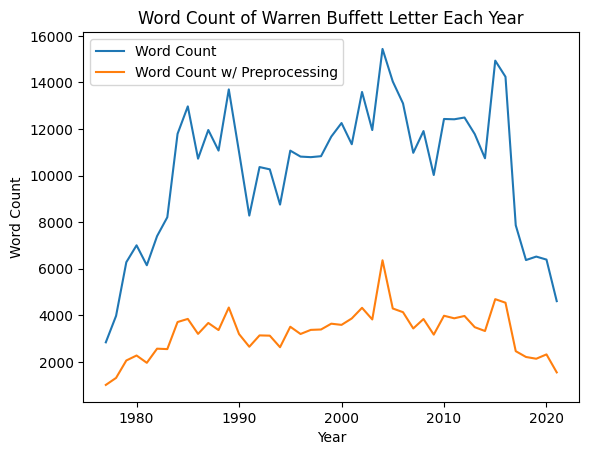

In [60]:
import matplotlib.pyplot as plt

# Plot lengths in hist
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(df['Year'], df['Word Count'], label='Word Count')
ax.plot(df_words['Year'], df_words['Word Count'], label='Word Count w/ Preprocessing')
ax.set_title('Word Count of Warren Buffett Letter Each Year')
ax.set_xlabel('Year')
ax.set_ylabel('Word Count')
ax.legend()